# Least-squares with matrix projection

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_regression

In [3]:
X, y = make_regression(n_samples=100, n_features=1, noise=5, random_state=42)
X.shape, y.shape

((100, 1), (100,))

In [4]:
A = np.array([[1.0, x] for x in X.squeeze(1)])
b = y
A[0]

array([1.        , 0.93128012])

## Orthonormal Projection

In [5]:
lft = A.T @ A
lft

array([[100.        , -10.38465174],
       [-10.38465174,  82.73062939]])

In [6]:
ryt = A.T @ b
ryt

array([-389.2098963 , 3558.74161257])

## Guassian Elimiation

In [7]:
lft[1] *= 100/-10.38465174
ryt[1] *= 100/-10.38465174
lft[1] -= lft[0]
ryt[1] -= ryt[0]

In [8]:
B1 = ryt[1] / lft[1][1] #m
B1

43.08913515357069

In [9]:
B0 = (ryt[0] - (lft[0][1] * B1)) / lft[0][0]
B0

0.5825576602639267

In [10]:
pred = np.array([B0 + B1 * x for x in X[:,0]])
pred.shape

(100,)

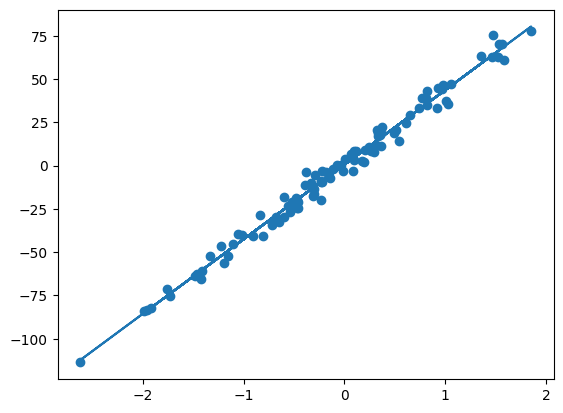

In [11]:
plt.scatter(X[:,0], y)
plt.plot(X[:,0], pred)